In [0]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [0]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,0.927622,1.0,1.000000,0.624287,-0.206993,1.0,0.000000,0.090789,0.0,0.552201,0.000000,0.0,1.0
1,-2.117138,1.0,0.816497,0.454038,0.159591,0.0,0.397544,1.444548,0.0,0.715169,0.000000,0.0,1.0
2,-1.529863,0.0,0.577350,0.454038,-0.864692,0.0,0.000000,0.931137,0.0,0.398844,1.000000,0.0,1.0
3,0.253797,1.0,0.577350,0.335019,-0.141353,0.0,0.397544,1.141680,0.0,0.265991,1.000000,0.0,1.0
4,0.355054,0.0,0.000000,0.335019,2.100829,0.0,0.397544,0.601134,1.0,0.210865,1.000000,0.0,1.0
5,0.355054,1.0,0.000000,0.568560,-1.150460,0.0,0.397544,0.008368,0.0,0.145476,0.707107,0.0,1.0
6,0.253797,0.0,0.577350,0.568560,1.054214,0.0,0.000000,0.212382,0.0,0.379044,0.707107,0.0,1.0
7,-1.125867,1.0,0.577350,0.335019,0.431579,0.0,0.397544,0.966733,0.0,0.323580,1.000000,0.0,1.0
8,-0.170168,1.0,0.816497,0.909866,-0.982712,1.0,0.397544,0.563348,0.0,0.179818,1.000000,0.0,1.0
9,0.355054,1.0,0.816497,0.679061,-1.750157,0.0,0.397544,1.002123,0.0,0.436427,1.000000,0.0,1.0


In [0]:
X = dataset.iloc[:, [*range(1,13),12]].values
Y = dataset['age'].values

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [0]:
input_layer_size = 13
first_hidden_layer_size = 12
second_hidden_layer_size = 12
output_layer_size = 1
epochs_number = 50
batch_size = 4

In [0]:
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [0]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [0]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 0s 858us/step - loss: 1.0228 - mean_absolute_error: 0.8163 - mean_squared_error: 1.0228 - val_loss: 1.1435 - val_mean_absolute_error: 0.8121 - val_mean_squared_error: 1.1435
Epoch 2/50
242/242 [==============================] - 0s 464us/step - loss: 0.9361 - mean_absolute_error: 0.7898 - mean_squared_error: 0.9361 - val_loss: 1.0807 - val_mean_absolute_error: 0.7882 - val_mean_squared_error: 1.0807
Epoch 3/50
242/242 [==============================] - 0s 386us/step - loss: 0.8835 - mean_absolute_error: 0.7765 - mean_squared_error: 0.8835 - val_loss: 1.0367 - val_mean_absolute_error: 0.7775 - val_mean_squared_error: 1.0367
Epoch 4/50
242/242 [==============================] - 0s 304us/step - loss: 0.8273 - mean_absolute_error: 0.7500 - mean_squared_error: 0.8273 - val_loss: 0.9966 - val_mean_absolute_error: 0.7680 - val_mean_squared_error: 0.9966
Epoch 5/50
242/242 [=======================

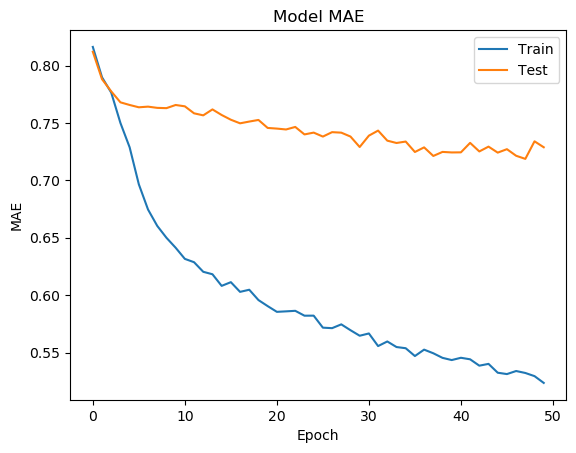

In [0]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

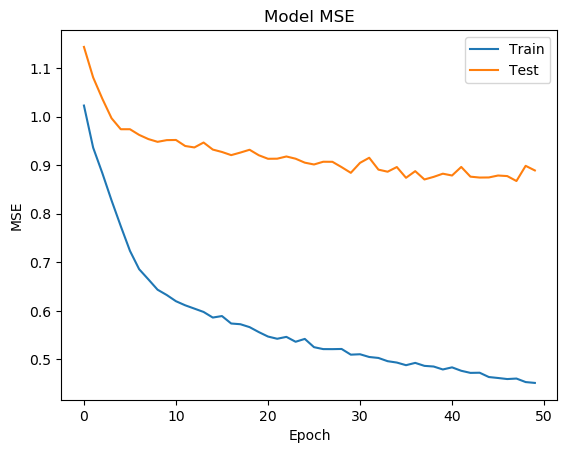

In [0]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [0]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

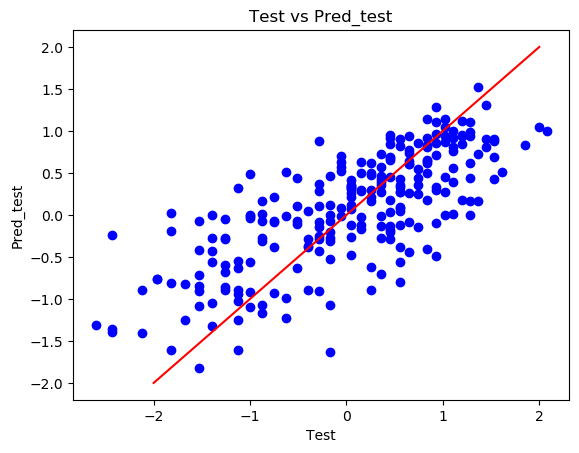

In [0]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

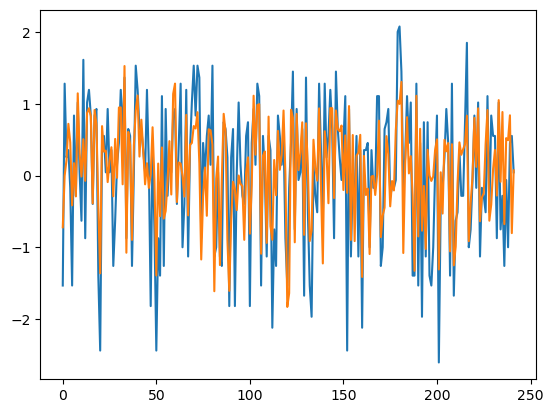

In [0]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [0]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

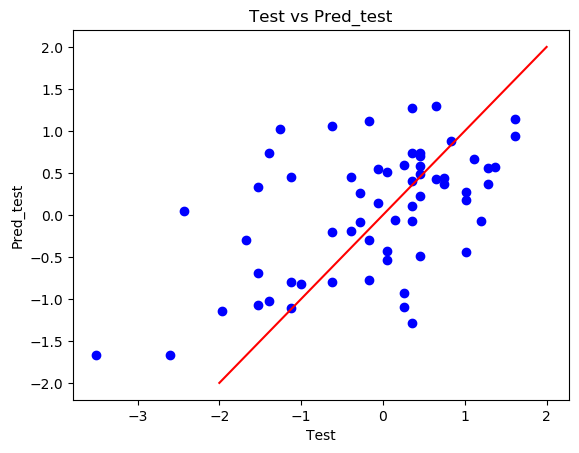

In [0]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

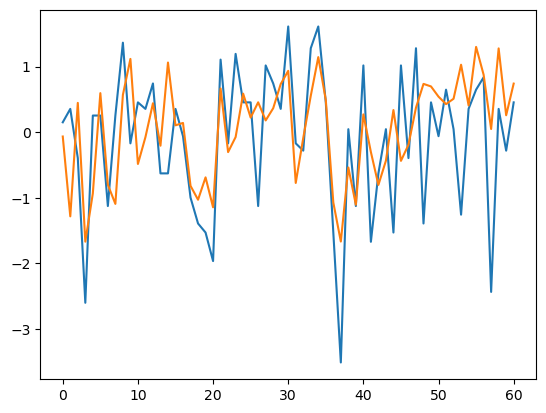

In [0]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [0]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.6605346713823654
0.9429223266492813


In [0]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9925891757011414, p = 0.2674887776374817
Test k = 0.9722794890403748, p = 0.18057848513126373


In [0]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9869220852851868, p_s = 0.007608790881931782
k_n = 10.364542482439102, p_n = 0.005615238359406882


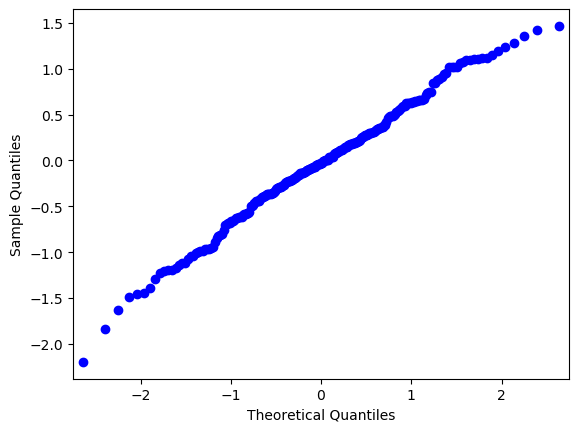

In [0]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

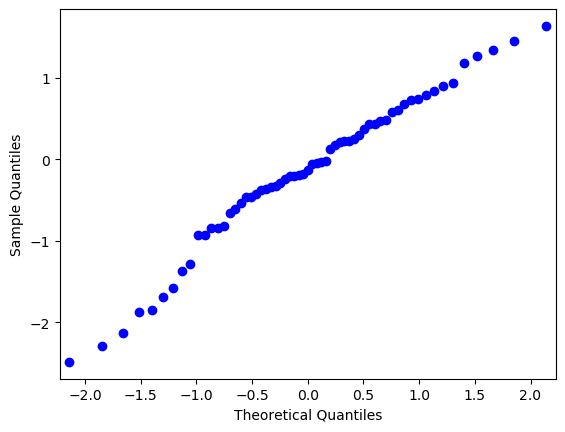

In [0]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

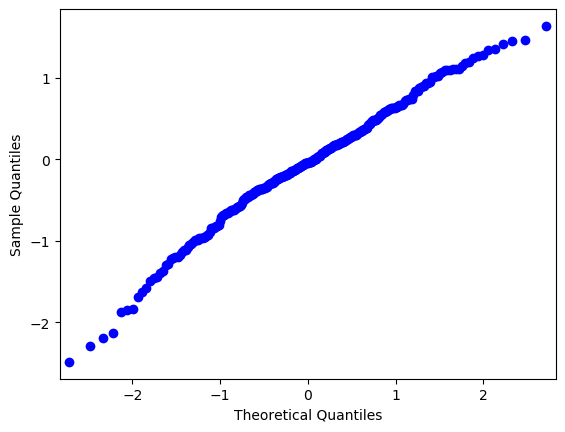

In [0]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

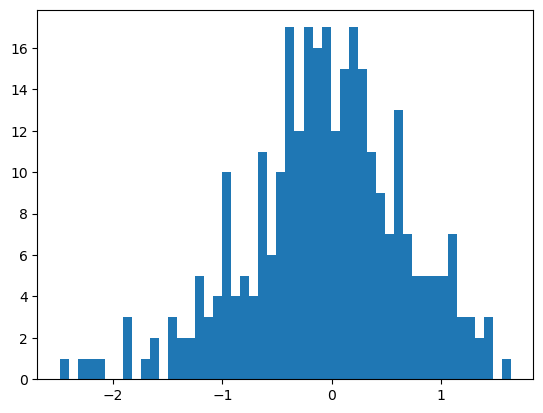

In [0]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [0]:
model.save('1_SimpleNeuralNetwork.h5')